In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\Train (2).csv")

In [3]:
df.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


# Univariate Analysis

In [4]:
df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
count,31028.000000,31248.000000,31647.000000,31336.000000,31535.000000,5816.000000,31647.000000,31647.000000
mean,40.439216,1368.112615,15.818561,256.184038,2.776629,224.995186,0.591620,0.107246
std,10.751392,3085.342417,8.322970,256.181479,3.153293,114.991828,2.499675,0.309430
min,18.000000,-8020.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,72.000000,8.000000,103.000000,1.000000,133.000000,0.000000,0.000000
50%,39.000000,449.000000,16.000000,179.000000,2.000000,195.000000,0.000000,0.000000
75%,48.000000,1413.000000,21.000000,315.250000,3.000000,329.000000,0.000000,0.000000
max,97.000000,102128.000000,31.000000,4900.000000,63.000000,871.000000,275.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [6]:
for col in df.select_dtypes(include=['int','float','object']).columns:
    print([col])
    print(df[col].nunique())

['id']
31647
['customer_age']
77
['job_type']
12
['marital']
3
['education']
4
['default']
2
['balance']
6563
['housing_loan']
2
['personal_loan']
2
['communication_type']
3
['day_of_month']
31
['month']
12
['last_contact_duration']
1447
['num_contacts_in_campaign']
46
['days_since_prev_campaign_contact']
511
['num_contacts_prev_campaign']
41
['prev_campaign_outcome']
4
['term_deposit_subscribed']
2


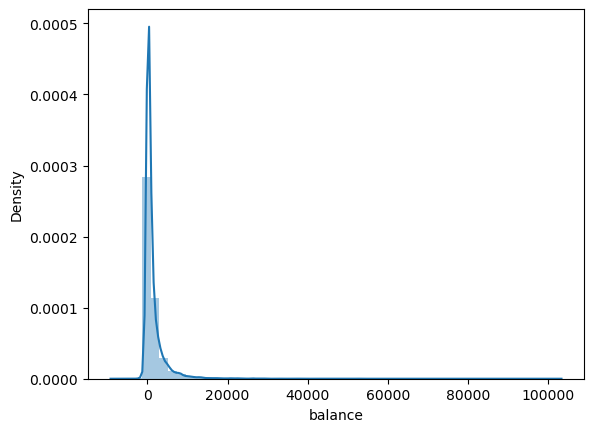

In [7]:
sns.distplot(df['balance']);

In [8]:
df.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')

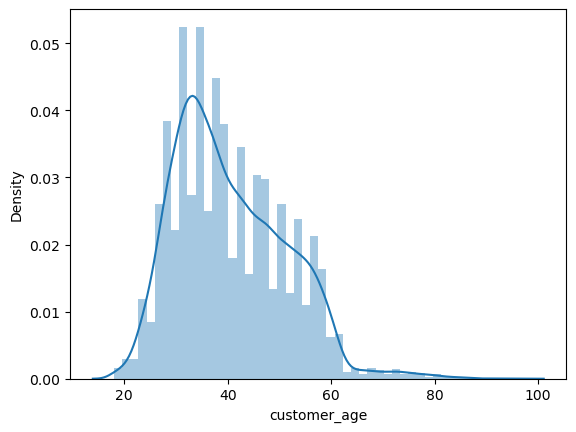

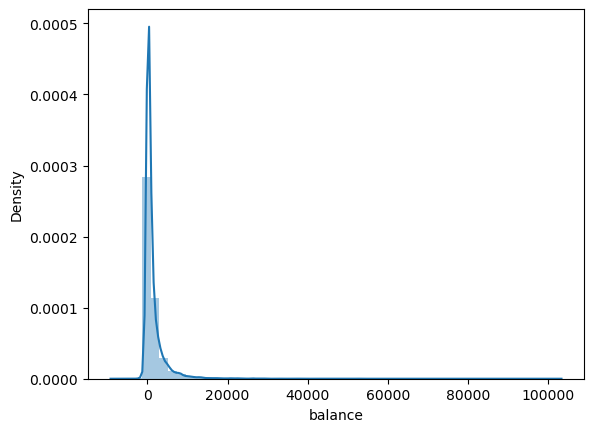

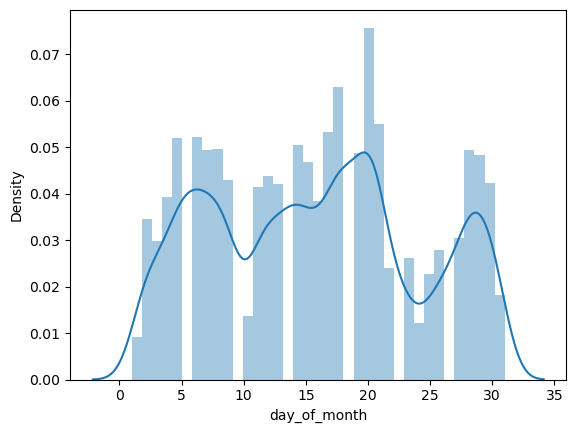

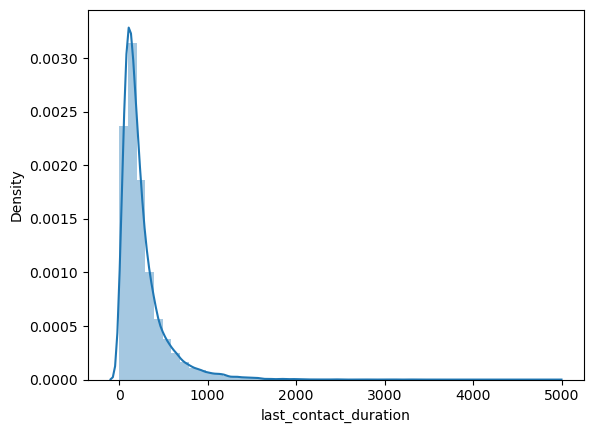

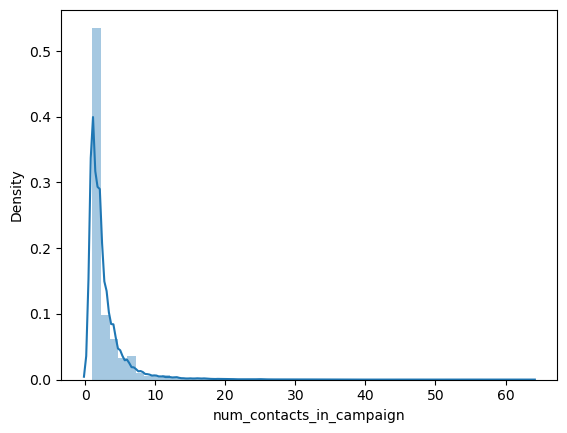

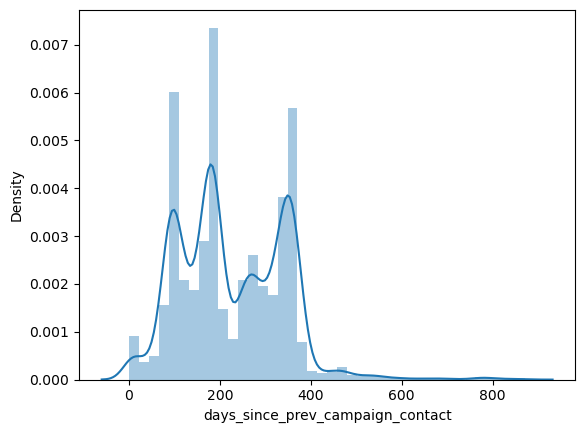

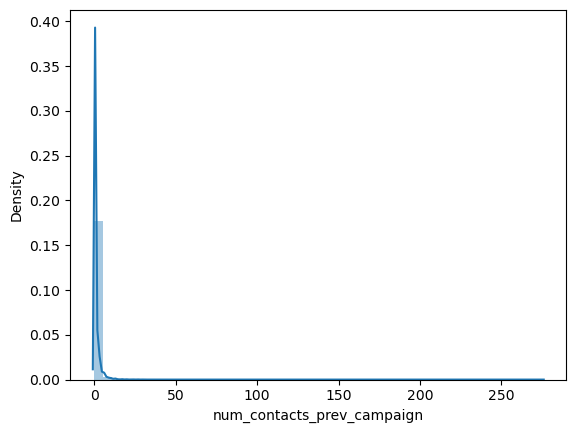

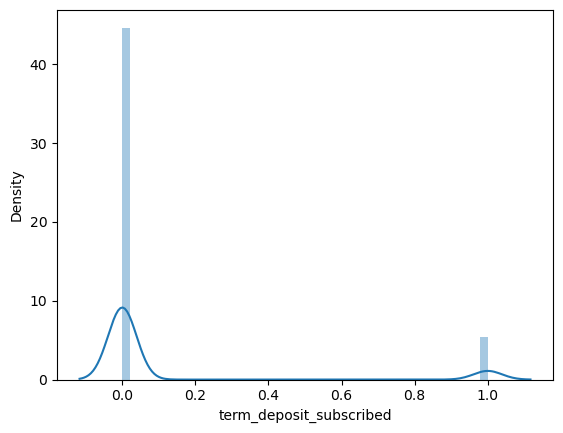

In [9]:
columns = ['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
                    'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
                    'num_contacts_prev_campaign', 'term_deposit_subscribed']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

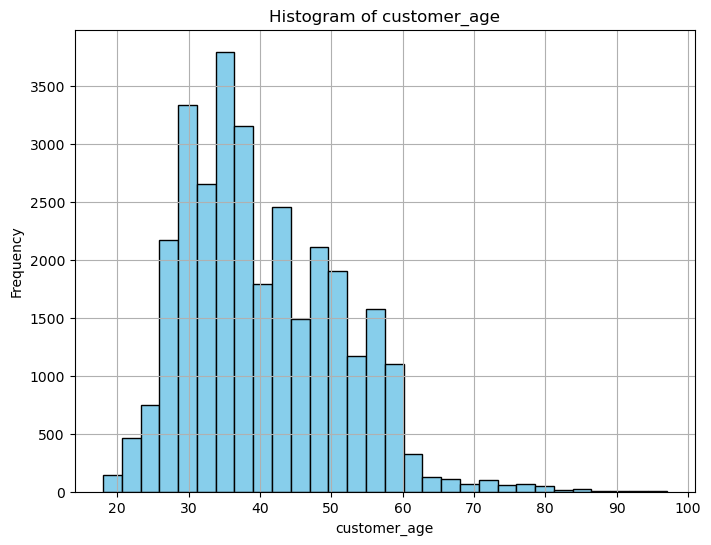

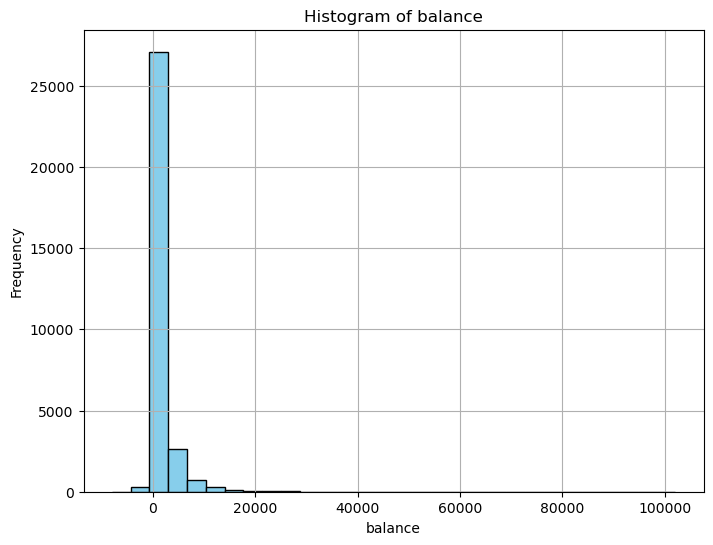

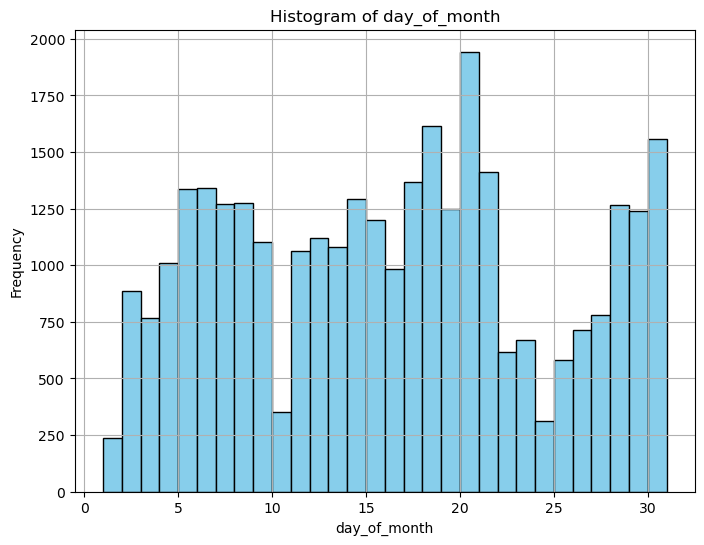

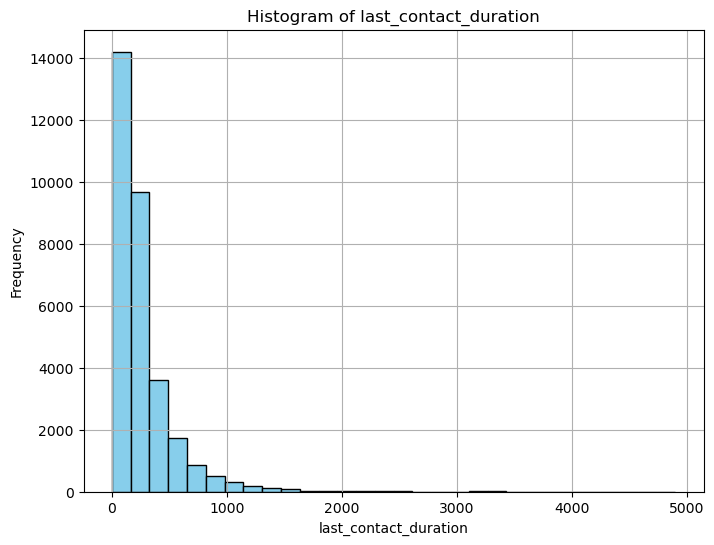

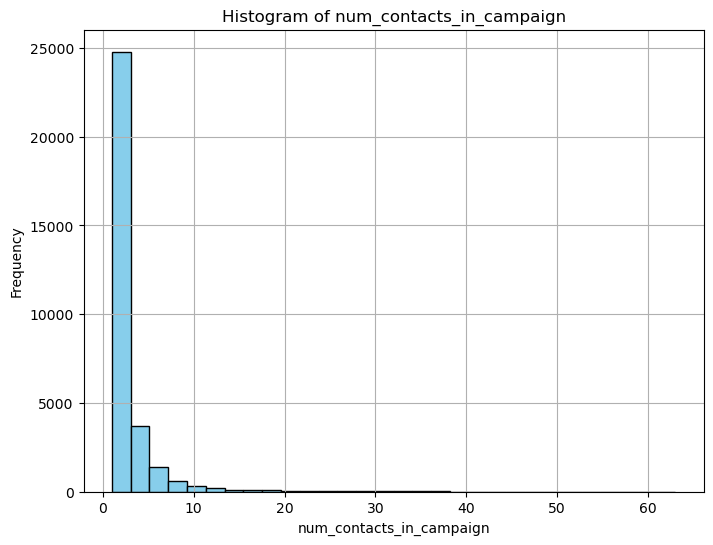

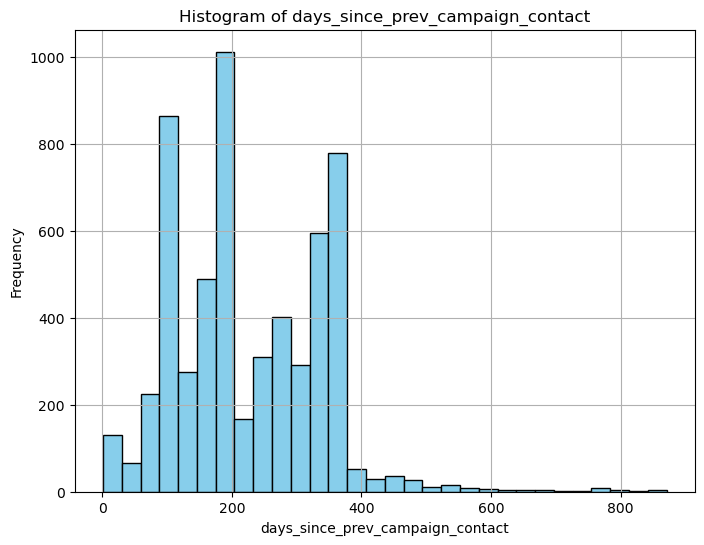

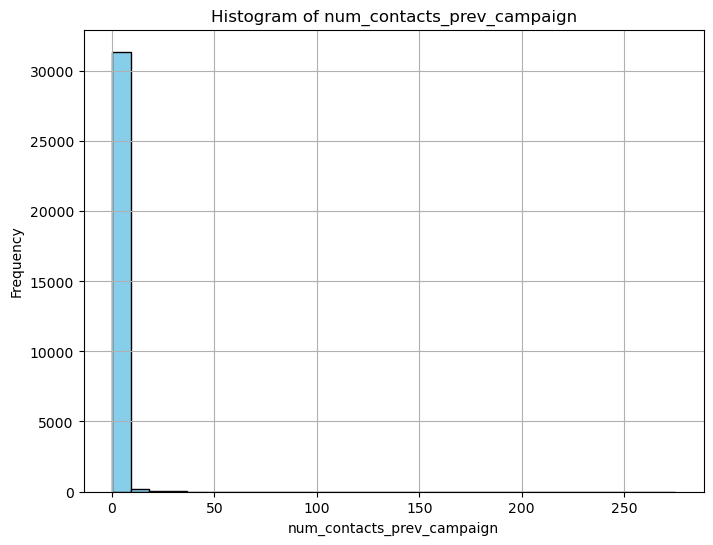

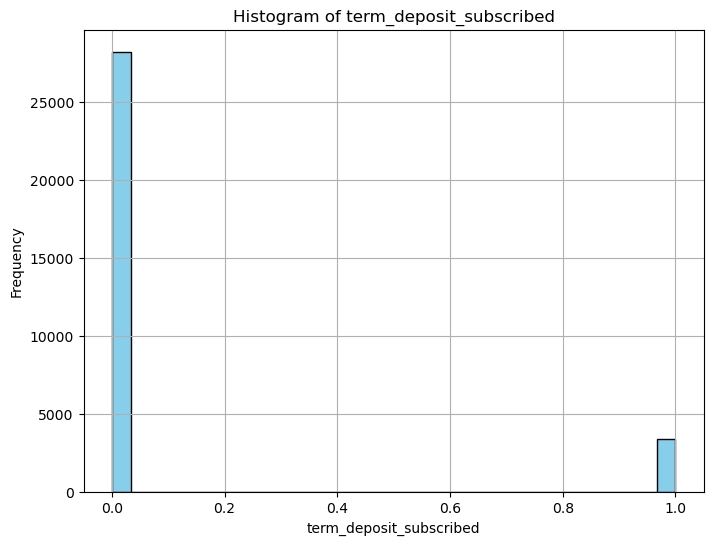

In [10]:
selected_columns = ['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
                    'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
                    'num_contacts_prev_campaign', 'term_deposit_subscribed']


for column in selected_columns:
    plt.figure(figsize=(8, 6))
    df[column].hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

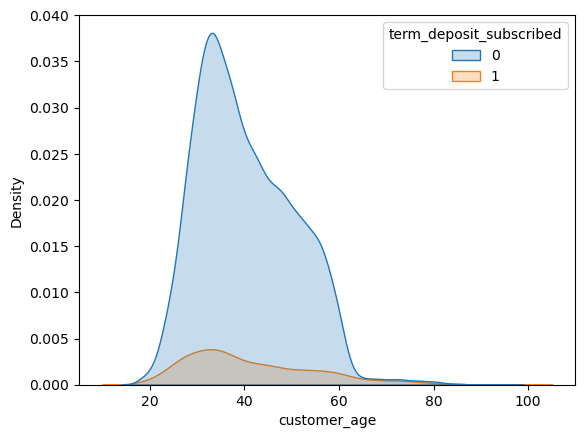

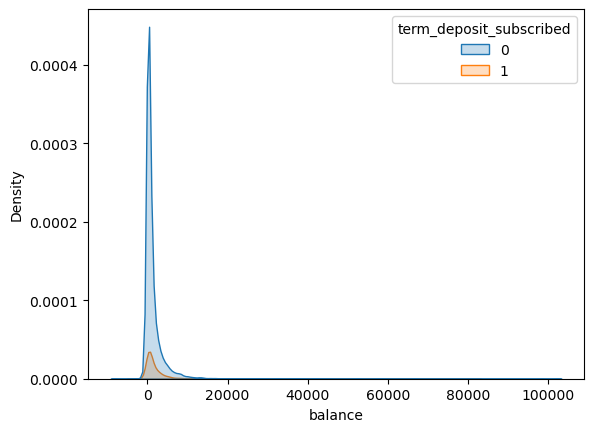

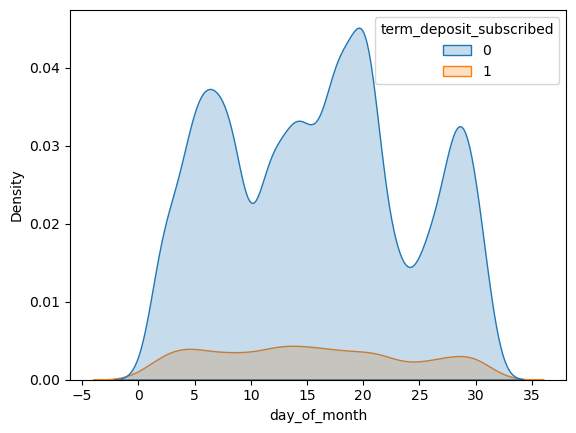

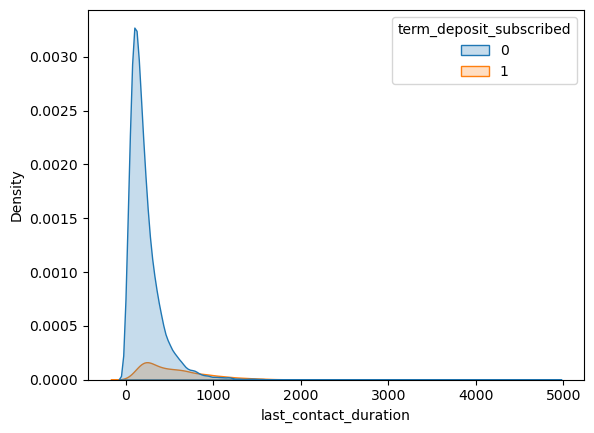

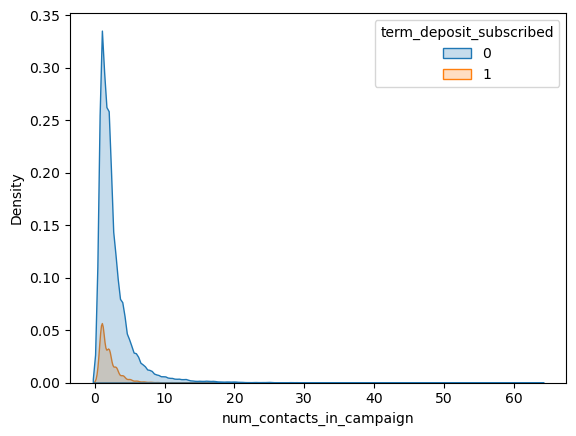

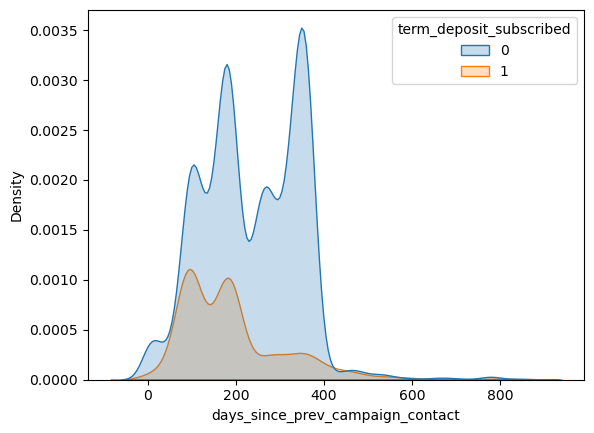

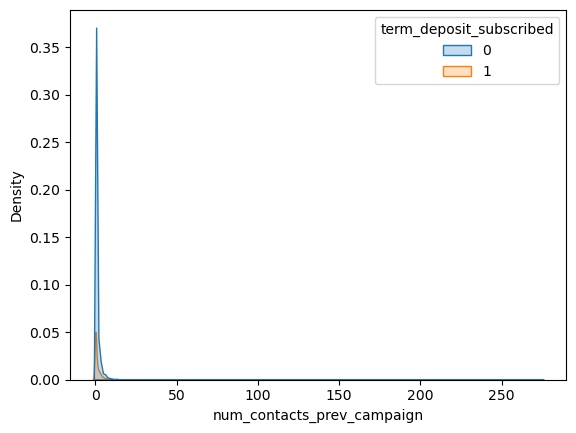

In [11]:
columns = ['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
                    'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
                    'num_contacts_prev_campaign']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True,hue=df['term_deposit_subscribed'])

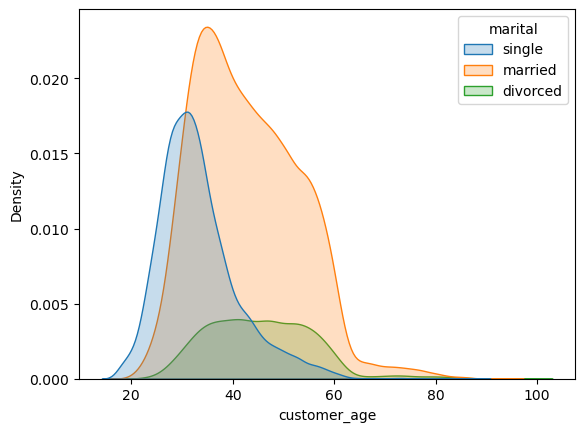

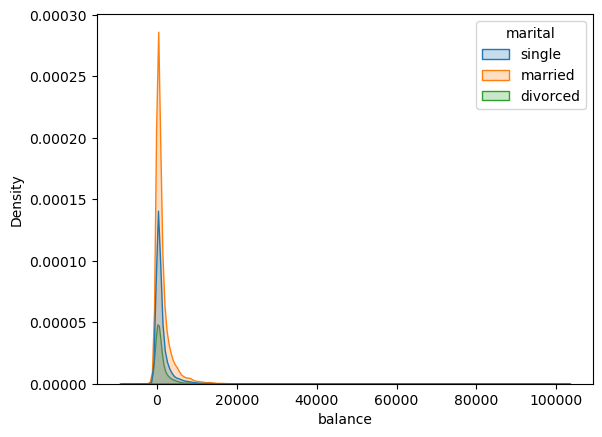

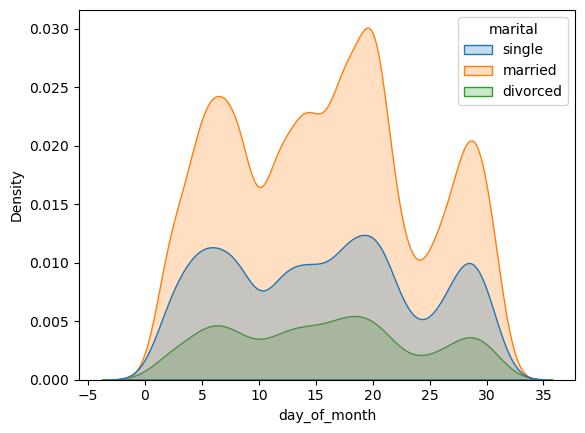

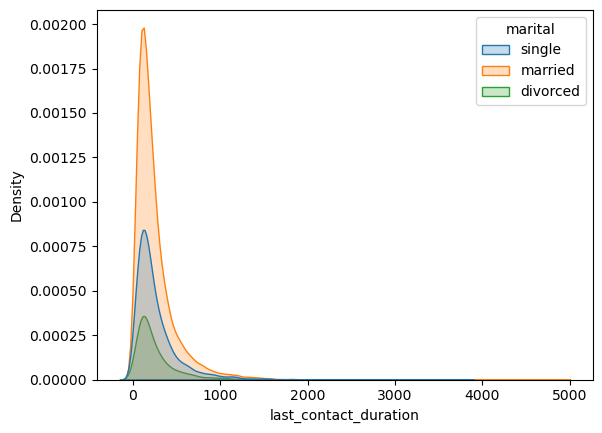

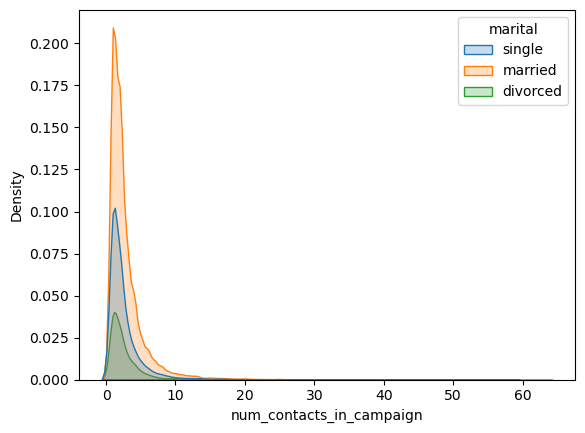

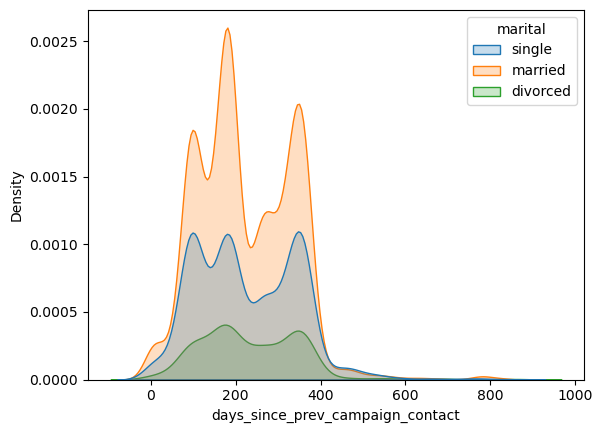

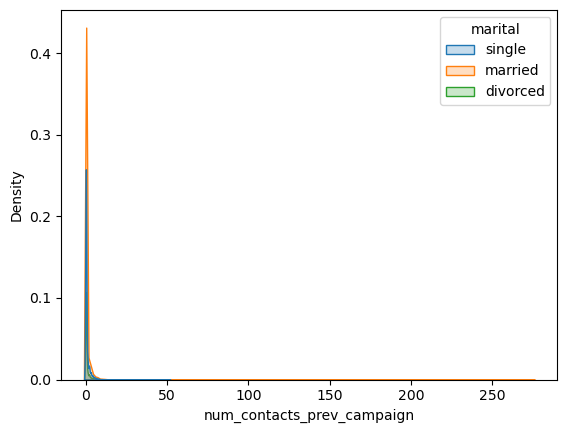

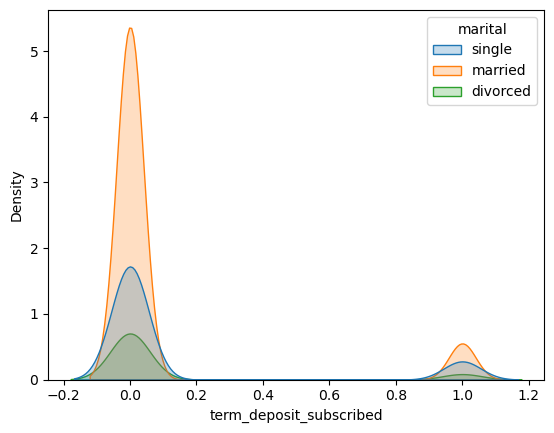

In [12]:
columns = ['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
                    'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
                    'num_contacts_prev_campaign', 'term_deposit_subscribed']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True,hue=df['marital'])

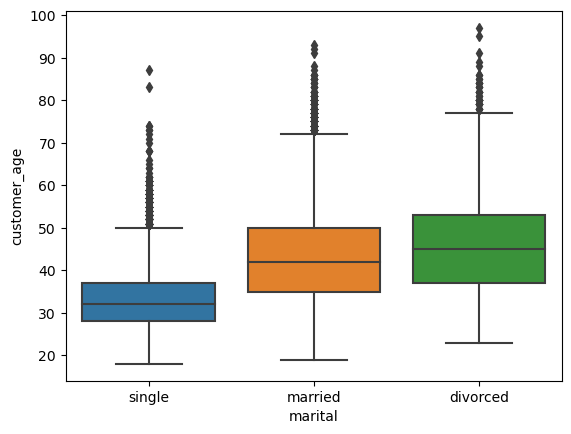

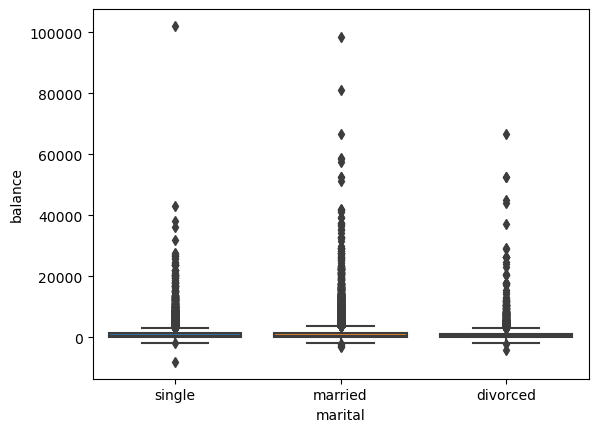

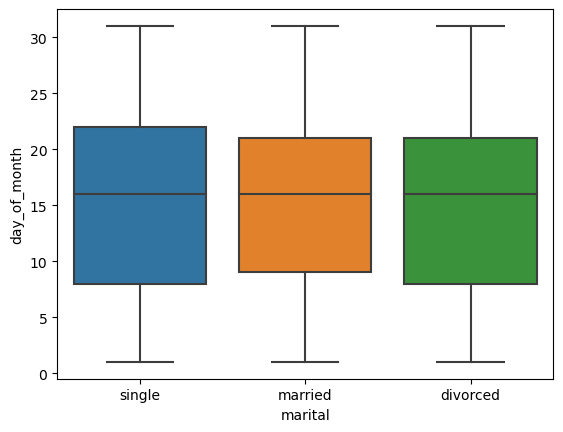

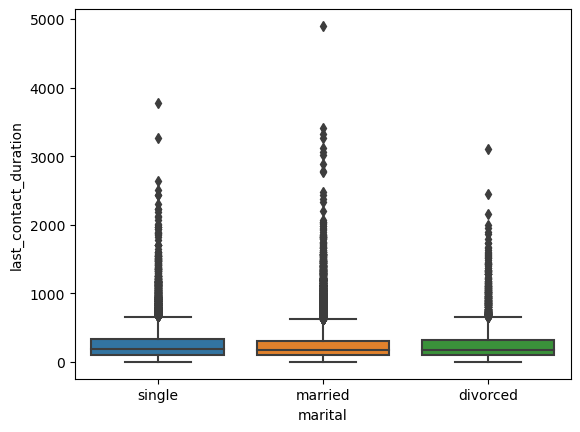

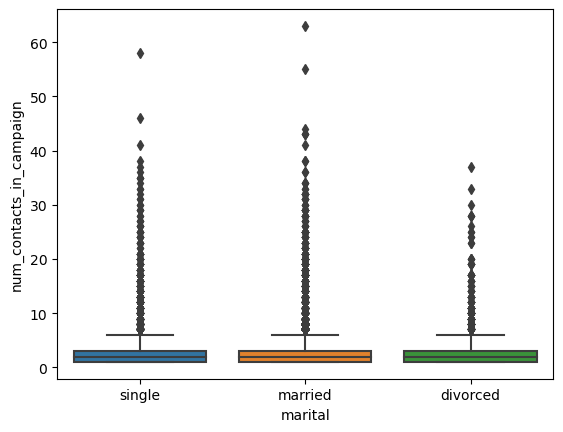

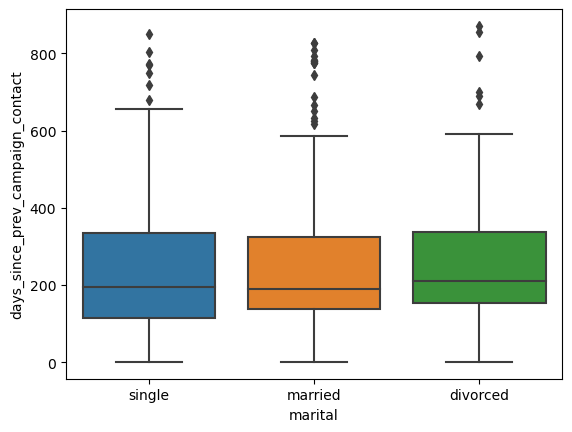

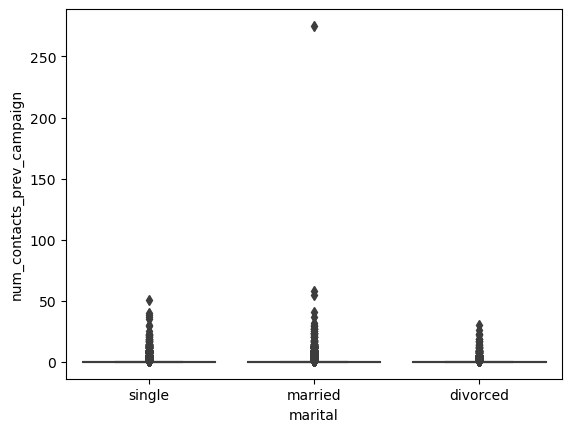

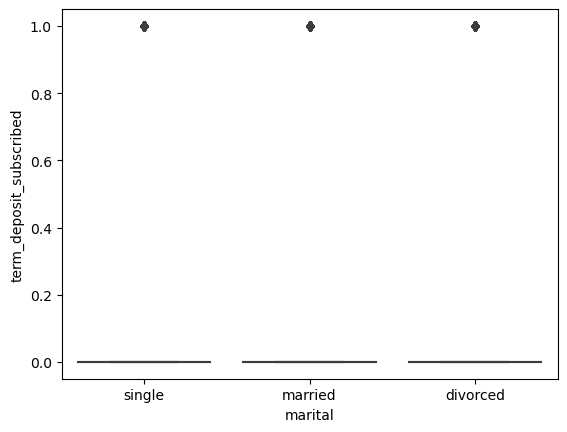

In [13]:
columns = ['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
                    'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
                    'num_contacts_prev_campaign', 'term_deposit_subscribed']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='marital',y=df[i])

In [14]:
df['marital'].value_counts(normalize=True)

married     0.601486
single      0.281201
divorced    0.117313
Name: marital, dtype: float64

# Bivariate Analysis

<AxesSubplot:xlabel='balance', ylabel='customer_age'>

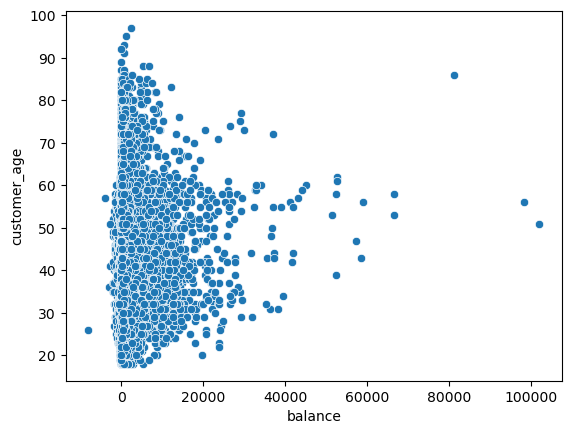

In [15]:
sns.scatterplot(data=df, x='balance',y='customer_age' )

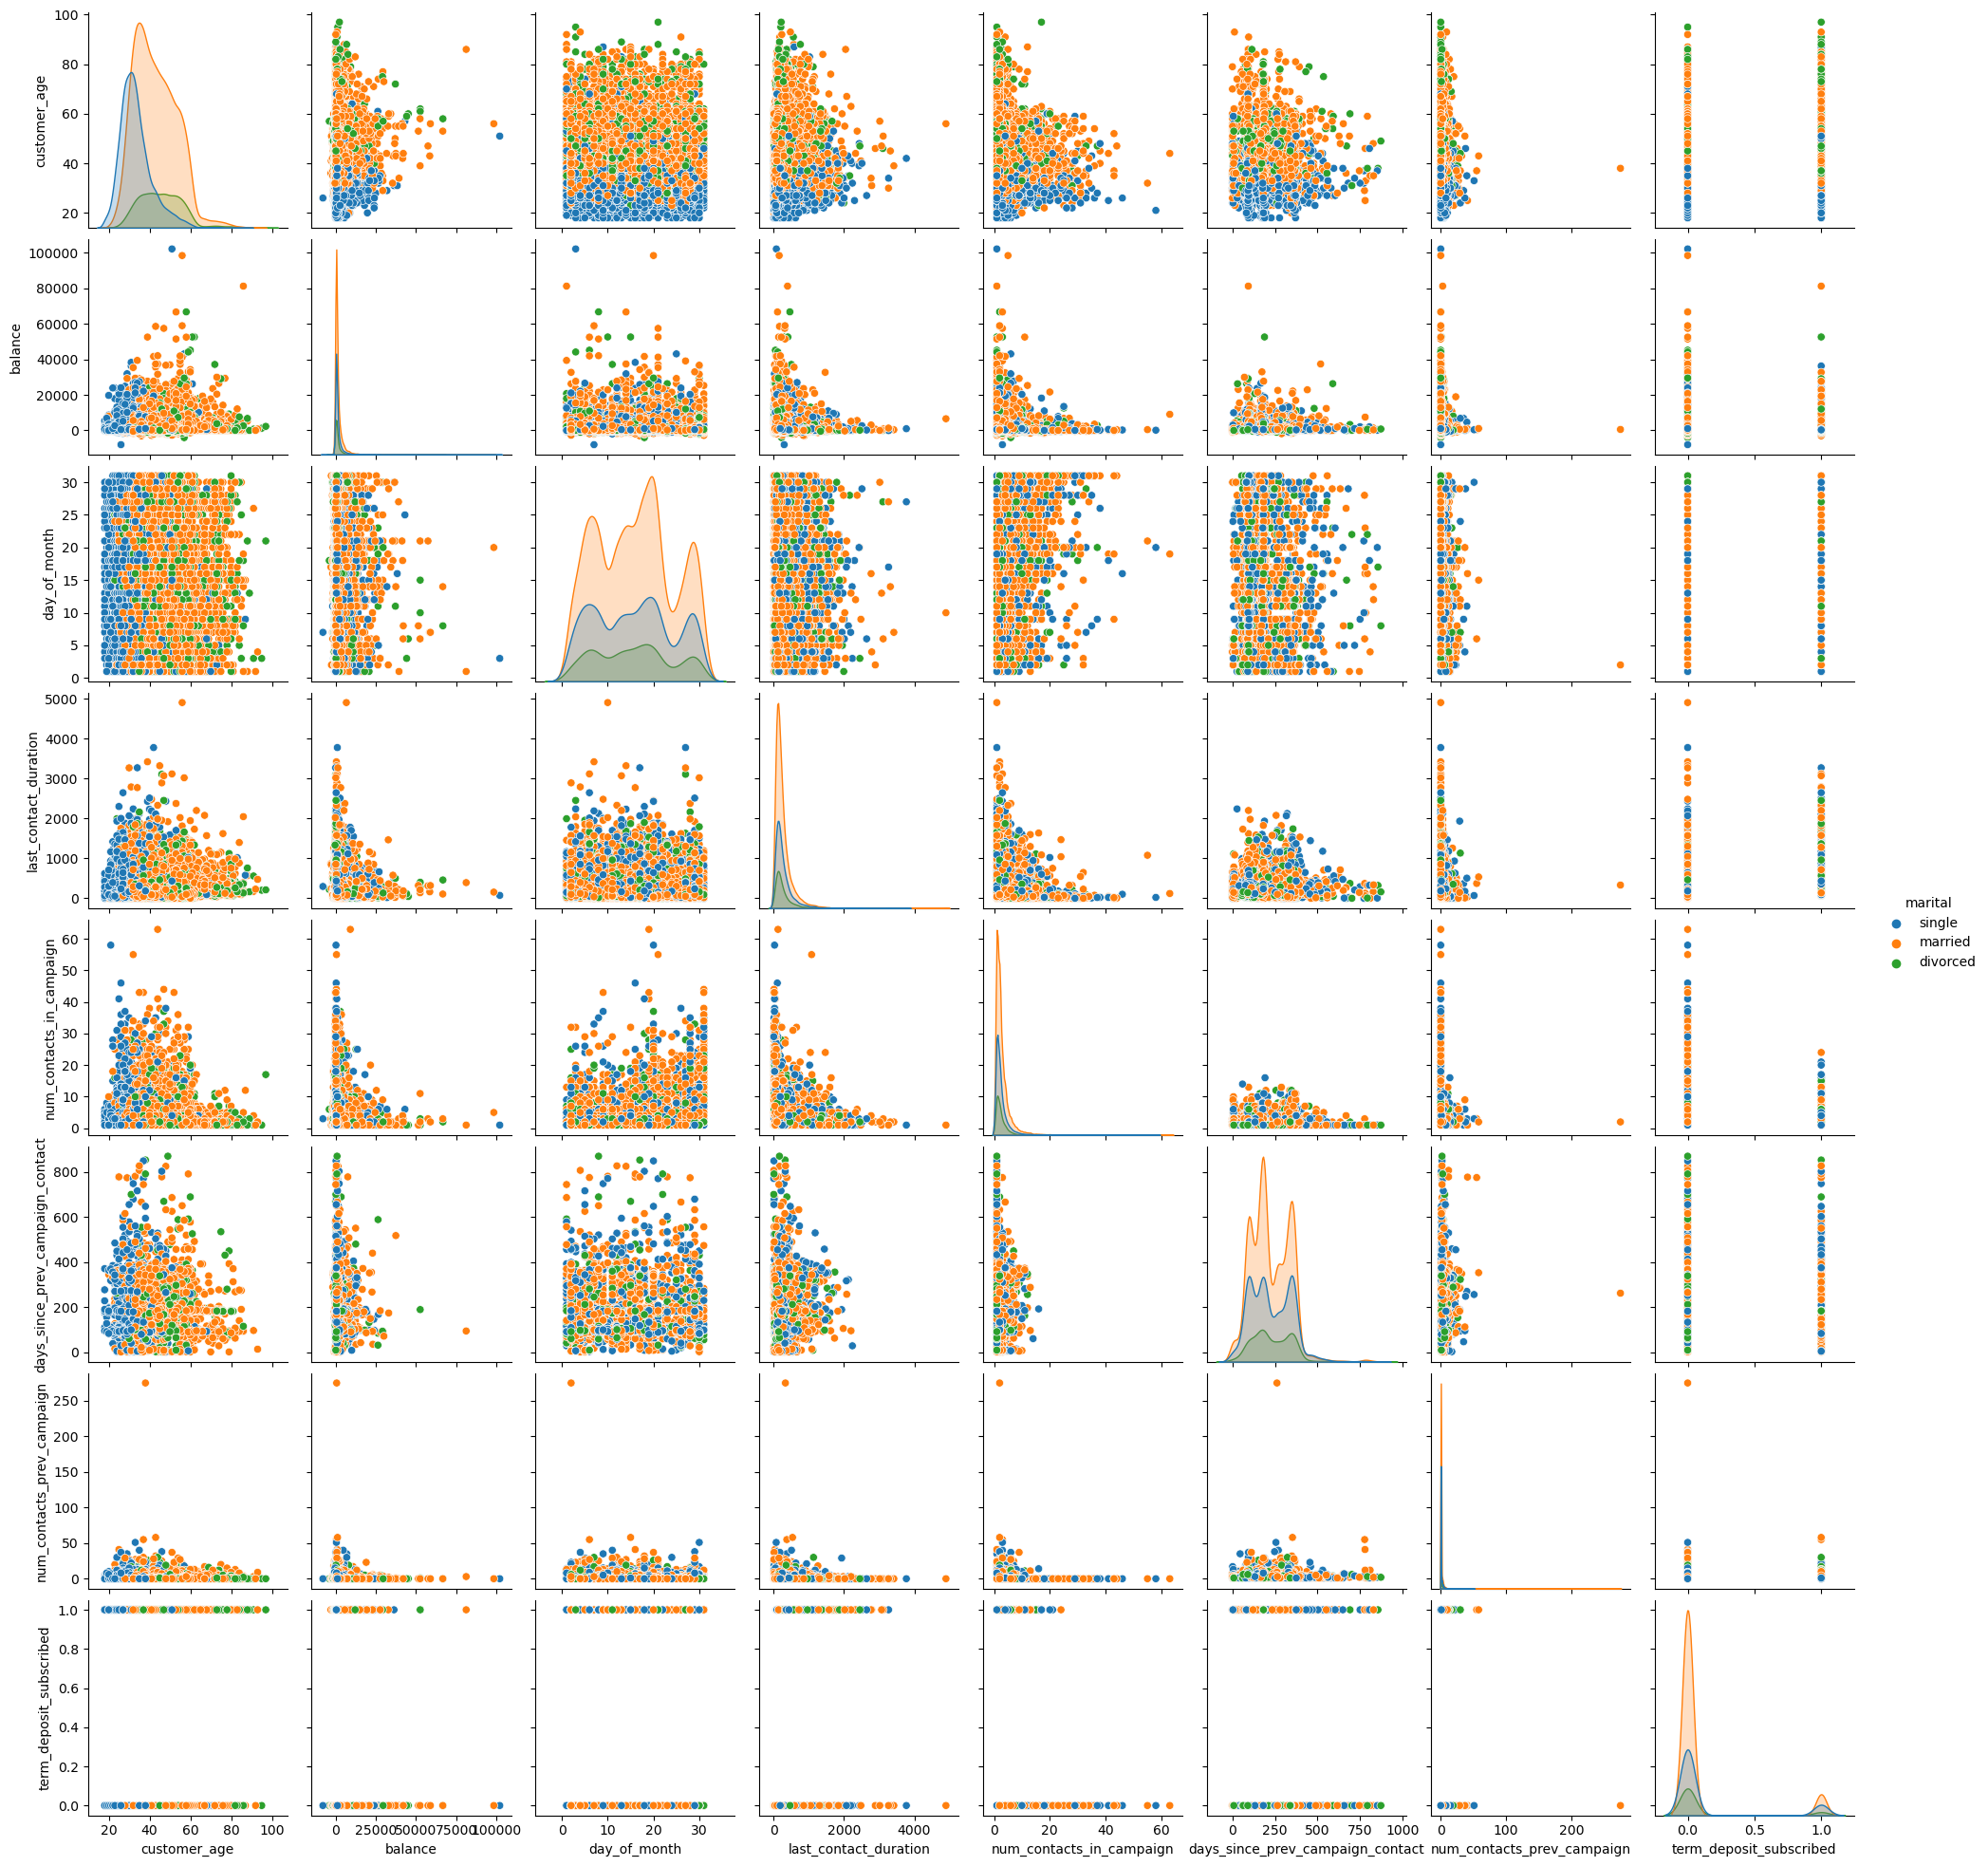

In [16]:
sns.pairplot(df,hue='marital')

In [17]:
df.groupby(['marital'])['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
                    'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
                    'num_contacts_prev_campaign', 'term_deposit_subscribed'].mean()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
marital,,,,,,,,
divorced,45.442021,1224.378867,15.705548,261.507516,2.651560,234.625000,0.538566,0.106089
married,42.840312,1431.114582,15.899076,252.018447,2.848001,222.668081,0.573291,0.093059
single,33.212788,1291.738122,15.692221,263.486721,2.675718,226.046473,0.653156,0.138534


In [18]:
df.corr()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
customer_age,1.000000,0.103411,-0.012751,-0.006935,0.006194,-0.115855,-0.001431,0.031207
balance,0.103411,1.000000,0.001626,0.016717,-0.020814,-0.122880,0.011426,0.052134
day_of_month,-0.012751,0.001626,1.000000,-0.034856,0.165168,-0.075713,-0.050596,-0.026898
last_contact_duration,-0.006935,0.016717,-0.034856,1.000000,-0.086517,-0.026646,0.005274,0.416874
num_contacts_in_campaign,0.006194,-0.020814,0.165168,-0.086517,1.000000,0.047921,-0.033212,-0.070675
days_since_prev_campaign_contact,-0.115855,-0.122880,-0.075713,-0.026646,0.047921,1.000000,-0.017738,-0.165117
num_contacts_prev_campaign,-0.001431,0.011426,-0.050596,0.005274,-0.033212,-0.017738,1.000000,0.089881
term_deposit_subscribed,0.031207,0.052134,-0.026898,0.416874,-0.070675,-0.165117,0.089881,1.000000


<AxesSubplot:>

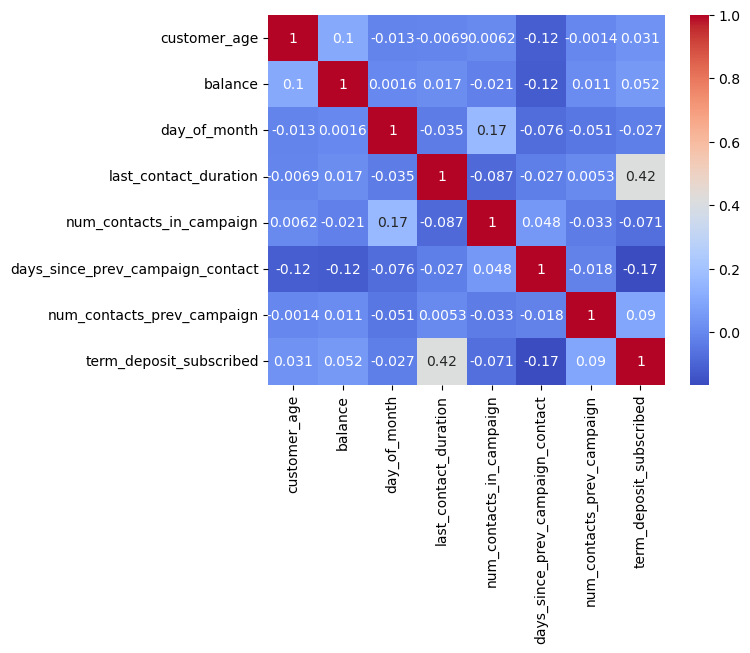

In [19]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')